In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import mnist

In [3]:
(x_train , y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_train = x_train/255

In [6]:
x_train = x_train.reshape(len(x_train),28,28,1)

In [7]:
x_test = x_test/255
x_test = x_test.reshape(len(x_test),28,28,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray()

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [10]:
y_test = ohe.transform(y_test).toarray()

In [11]:
y_test.shape

(10000, 10)

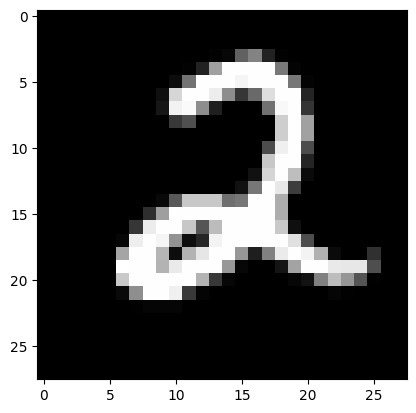

----------- 2 --------------


In [12]:
x =3333
pixel = x_train[x,:,:,:].reshape(28,28)
plt.imshow(pixel,cmap = 'gray')
plt.show()
print(f'-----------',np.argmax(y_train[x]),'--------------')

In [13]:
import tensorflow.keras as keras
from keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten
from keras.models import Sequential

In [14]:
model = Sequential()

In [15]:

model.add(Conv2D(40,kernel_size = (5,5),padding = 'same',input_shape= (28,28,1) , activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Conv2D(40,kernel_size =(5,5),padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Conv2D(40,(5,5),padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(units = 50 , activation ='relu' , kernel_initializer ='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units = 30 , activation ='relu' , kernel_initializer ='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units = 10 , activation ='softmax' ))
model.compile(optimizer ='adam', loss ='categorical_crossentropy' , metrics =['accuracy'])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 40)        1040      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 40)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 40)        40040     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 40)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 40)          40040     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 40)         0

In [17]:
model.fit(x_train , y_train , epochs =20 , batch_size = 30 , validation_data =(x_test , y_test))

Epoch 1/20
2000/2000 [==============================] - 30s 6ms/step - loss: 0.2504 - accuracy: 0.9224 - val_loss: 0.0447 - val_accuracy: 0.9853
Epoch 2/20
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0771 - accuracy: 0.9796 - val_loss: 0.0381 - val_accuracy: 0.9894
Epoch 3/20
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0577 - accuracy: 0.9853 - val_loss: 0.0316 - val_accuracy: 0.9913
Epoch 4/20
2000/2000 [==============================] - 11s 6ms/step - loss: 0.0437 - accuracy: 0.9886 - val_loss: 0.0347 - val_accuracy: 0.9901
Epoch 5/20
2000/2000 [==============================] - 11s 6ms/step - loss: 0.0381 - accuracy: 0.9901 - val_loss: 0.0423 - val_accuracy: 0.9895
Epoch 6/20
2000/2000 [==============================] - 11s 6ms/step - loss: 0.0343 - accuracy: 0.9913 - val_loss: 0.0317 - val_accuracy: 0.9916
Epoch 7/20
2000/2000 [==============================] - 12s 6ms/step - loss: 0.0272 - accuracy: 0.9928 - val_loss: 0.0345 - val_ac

In [18]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


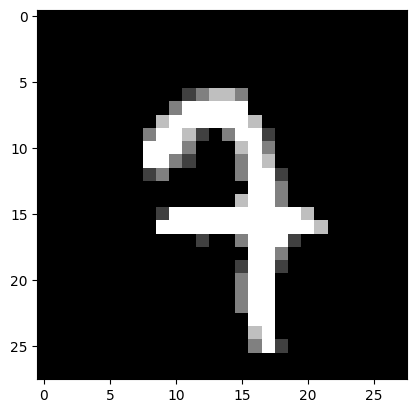

Predicted--------> 7
Actual-----------> 7


In [19]:
x =3333
pixel = x_test[x,:,:,:].reshape(28,28)
plt.imshow(pixel,cmap = 'gray')
plt.show()
print(f'Predicted-------->',np.argmax(y_pred[x]))
print(f'Actual----------->',np.argmax(y_test[x]),)